# package_LAB

In [1]:
# Correct import statements and package reloads
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from ipywidgets import interact, FloatSlider
import package_DBR
import package_LAB

from importlib import reload
package_LAB = reload(package_LAB)
from package_DBR import myRound, SelectPath_RT, Delay_RT
from package_LAB import LL_RT,PID_RT




# LL_RT()

In [2]:
help(LL_RT)

Help on function LL_RT in module package_LAB:

LL_RT(MV, Kp, Ts, Tle, Tla, PV, PVInit=0, method='EBD')
    The function "LL_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tla: lag time constant [s]
    :Ts: sampling period [s]
    :Tle: lead time constant [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "LL_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

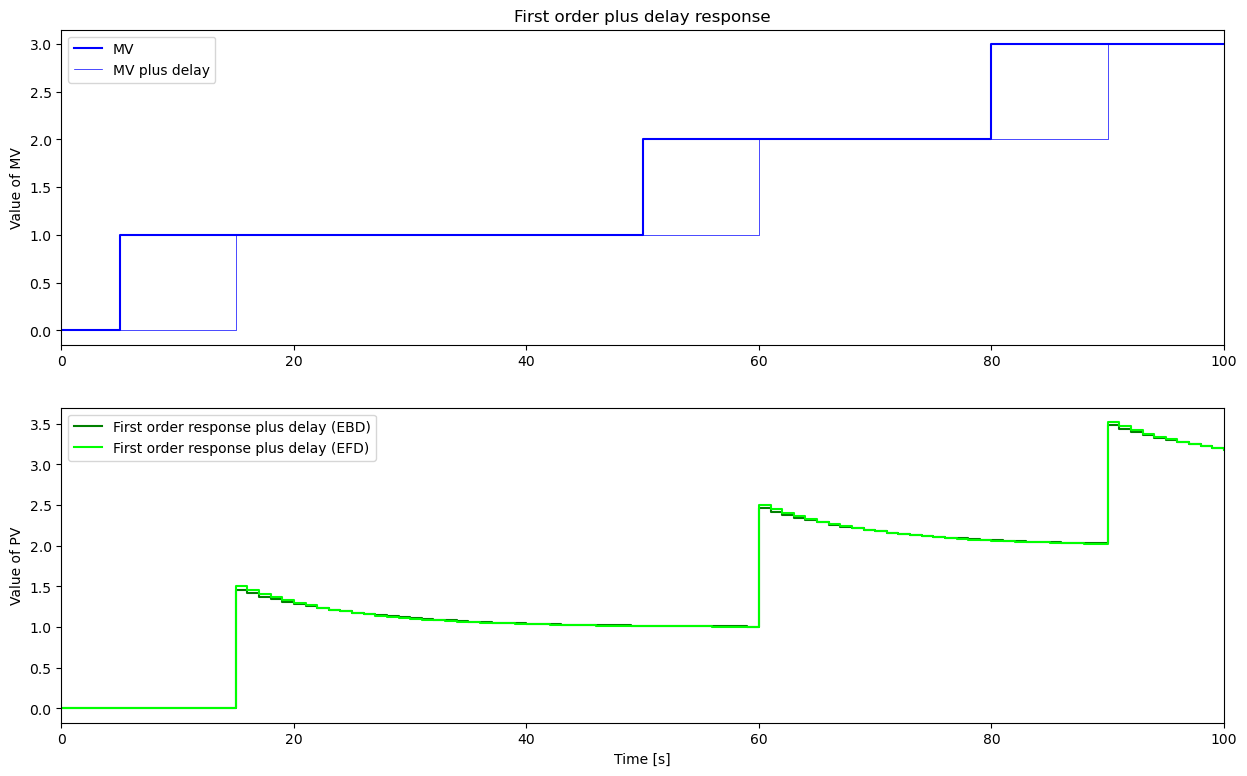

In [3]:
# Simulation parameters
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

# Initializing vectors
t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tla = 10
Tle = 15
T = 5
theta = 10

# Main loop
for i in range(0, N):
    t.append(i*Ts)
    SelectPath_RT(MVPath, t, MV)
    Delay_RT(MV, theta, Ts, MVDelay)
    LL_RT(MVDelay, Kp, Ts, Tle, Tla, PV_EBD, 0, 'EBD')
    LL_RT(MVDelay, Kp, Ts, Tle, Tla, PV_EFD, 0, 'EFD')
    # LL_RT(MVDelay, Kp, Ts, Tle, Tla, T, PV_TRAP, 0, 'TRAP')

# Plotting results
plt.figure(figsize=(15, 9))

plt.subplot(2, 1, 1)
plt.step(t, MV, 'b-', label='MV', where='post')
plt.step(t, MVDelay, 'b-', linewidth=0.5, label='MV plus delay', where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2, 1, 2)
plt.step(t, PV_EBD, 'g-', label='First order response plus delay (EBD)', where='post')
plt.step(t, PV_EFD, 'lime', label='First order response plus delay (EFD)', where='post')
# plt.step(t, PV_TRAP, 'springgreen', label='First order response plus delay (TRAP)', where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

# PID_RT

In [4]:
help(PID_RT)

Help on function PID_RT in module package_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, method='EBD-EBD')
    The function "PID_RT" needs to be included in a "for or while loop". 
    
    :SP: SP (or SetPoint) vector 
    :PV: PV (or Process Value) vector 
    :Man: Man (or Manual controller mode) vector (True or False) 
    :MVMan: MVMan (or Manual value for MV) vector 
    :MVFF: MVFF (or Feedforward) vector 
    
    :Kc: controller gain 
    :Ti: integral time constant [s] 
    :Td: derivative time constant [s] 
    :alpha: Tfd = alpha*Td where Tfd is the derivative filter time constant [s] 
    :Ts: sampling period [s] 
    
    :MVMin: minimum value for MV (used for saturation and anti wind-up) 
    :MVMax: maximum value for MV (used for saturation and anti wind-up) 
    
    :MV: MV (or Manipulated Value) vector 
    :MVP: MVP (or Propotional part of MV) vector 
    :MVI: MVI (or Integral part of MV) vec

In [16]:
# Simulation parameters
TSim = 100
Ts = 0.5
N = int(TSim/Ts) + 1

#Path for SP and PV
SPpath = {0: 0, 5: 10}
PVpath = {0: 0,85:5}
ManPath = {0: 0}
MVFFpath = {0: 0}


#Initialize vectors
t = []
Man = []
MVMan = []
MVFF = []

E = []
SP= []
PV= []

MV = []
MVP = []
MVI = []
MVD = []

#Parameters
Kc = 1.0
Ti = 10
Td = 2.5
alpha = 0.5

MVMin = 0
MVMax = 100
ManFF = 0
PVInit = 0

def update_plot(Kc, Ti, Td, alpha):
    t.clear()
    Man.clear()
    MVMan.clear()
    MVFF.clear()
    E.clear()
    SP.clear()
    PV.clear()
    MV.clear()
    MVP.clear()
    MVI.clear()
    MVD.clear()



    for i in range(0, N):
        t.append(i*Ts)
        SelectPath_RT(SPpath, t, SP)
        SelectPath_RT(PVpath, t, PV)
        SelectPath_RT(ManPath, t, Man)
        SelectPath_RT(MVFFpath, t, MVFF)
        PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF, PVInit, method='EBD-EBD')
    
    
    
    # Plot updated data
    plt.figure(figsize=(15, 8))
    plt.title("Alpha: " + str(alpha))
    plt.step(t, MV, 'g-', label='MV', where='post')
    plt.step(t, E, 'black', label='E', where='post')
    plt.step(t, MVP, 'orange', label='MVP', where='post', linewidth=0.5)
    plt.step(t, MVI, 'red', label='MVI', where='post', linewidth=0.5)
    plt.step(t, MVD, 'blue', label='MVD', where='post', linewidth=0.5)
    plt.ylabel('Value of MV')
    plt.xlabel('Time [s]')
    plt.legend(loc='best')
    plt.xlim([0, TSim])


Kc_slider = FloatSlider(value=Kc, min=0.1, max=5.0, step=0.1, description='Kc:')
Ti_slider = FloatSlider(value=Ti, min=0.1, max=10, step=0.1, description='Ti:')
Td_slider = FloatSlider(value=Td, min=0.1, max=10, step=0.1, description='Td:')
alpha_slider = FloatSlider(value=alpha, min=0.1, max=1.0, step=0.1, description='Alpha:')


interact(update_plot, Kc=Kc_slider, Ti=Ti_slider, Td=Td_slider, alpha=alpha_slider)

interactive(children=(FloatSlider(value=1.0, description='Kc:', max=5.0, min=0.1), FloatSlider(value=10.0, des…

<function __main__.update_plot(Kc, Ti, Td, alpha)>